In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
data_set = pd.read_csv(r"C:\Users\Varshith\OneDrive\Desktop\salary2.csv")
X = data_set.iloc[:, 1:-1].values
y = data_set.iloc[:, -1].values

In [46]:
y = y.reshape(len(y), 1)
y

array([[  17000],
       [  27000],
       [  40000],
       [  65000],
       [ 100000],
       [ 150000],
       [ 250000],
       [ 400000],
       [ 650000],
       [1000000],
       [1800000],
       [4000000]], dtype=int64)

In [47]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [48]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\Varshith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [50]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[298252.57347613]])

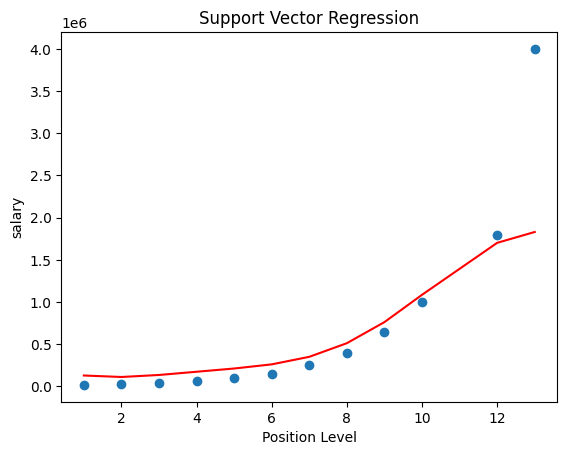

In [59]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y))
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color = "red")
plt.title("Support Vector Regression")
plt.xlabel("Position Level")
plt.ylabel("salary")

plt.show()

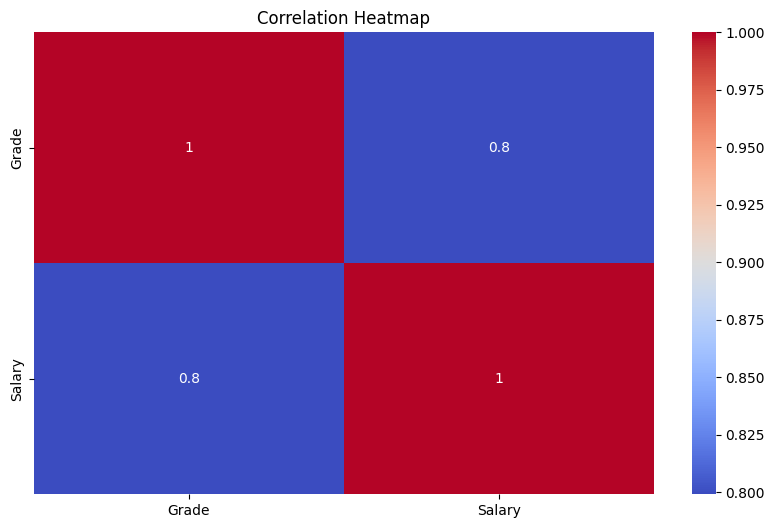

In [61]:
# Select only numeric columns
numeric_data = data_set.select_dtypes(include=np.number)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
